<a href="https://colab.research.google.com/github/AmiraliEsi83/ImageNet-data-base/blob/main/Imagenet_Gradcam_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os, sys, wget
from zipfile import ZipFile
url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download('http://cs231n.stanford.edu/tiny-imagenet-200.zip', out = os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".zip"):
        zip = ZipFile(file)
        zip.extractall()
    else:
        print("not found")

not found
not found
not found


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


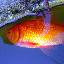

In [ ]:
from IPython.display import Image
Image('/content/tiny-imagenet-200/train/n01443537/images/n01443537_100.JPEG')

In [ ]:
import os
f = open('/content/tiny-imagenet-200/wnids.txt')
all_files = [fn.strip() for fn in f.readlines()]
all_files
len(all_files)

200

In [ ]:
file_names = ['/content/tiny-imagenet-200/train/'+fn+'/images/'+fn+'_' for fn in all_files]
file_names

['/content/tiny-imagenet-200/train/n02124075/images/n02124075_',
 '/content/tiny-imagenet-200/train/n04067472/images/n04067472_',
 '/content/tiny-imagenet-200/train/n04540053/images/n04540053_',
 '/content/tiny-imagenet-200/train/n04099969/images/n04099969_',
 '/content/tiny-imagenet-200/train/n07749582/images/n07749582_',
 '/content/tiny-imagenet-200/train/n01641577/images/n01641577_',
 '/content/tiny-imagenet-200/train/n02802426/images/n02802426_',
 '/content/tiny-imagenet-200/train/n09246464/images/n09246464_',
 '/content/tiny-imagenet-200/train/n07920052/images/n07920052_',
 '/content/tiny-imagenet-200/train/n03970156/images/n03970156_',
 '/content/tiny-imagenet-200/train/n03891332/images/n03891332_',
 '/content/tiny-imagenet-200/train/n02106662/images/n02106662_',
 '/content/tiny-imagenet-200/train/n03201208/images/n03201208_',
 '/content/tiny-imagenet-200/train/n02279972/images/n02279972_',
 '/content/tiny-imagenet-200/train/n02132136/images/n02132136_',
 '/content/tiny-imagenet-

In [ ]:
file_names_test = os.listdir('/content/tiny-imagenet-200/test/images')

In [ ]:
file_names_test = ['/content/tiny-imagenet-200/test/images/test_'+str(i)+'.JPEG' for i in range(len(file_names_test))]

In [ ]:
file_names_test, len(file_names_test)

(['/content/tiny-imagenet-200/test/images/test_0.JPEG',
  '/content/tiny-imagenet-200/test/images/test_1.JPEG',
  '/content/tiny-imagenet-200/test/images/test_2.JPEG',
  '/content/tiny-imagenet-200/test/images/test_3.JPEG',
  '/content/tiny-imagenet-200/test/images/test_4.JPEG',
  '/content/tiny-imagenet-200/test/images/test_5.JPEG',
  '/content/tiny-imagenet-200/test/images/test_6.JPEG',
  '/content/tiny-imagenet-200/test/images/test_7.JPEG',
  '/content/tiny-imagenet-200/test/images/test_8.JPEG',
  '/content/tiny-imagenet-200/test/images/test_9.JPEG',
  '/content/tiny-imagenet-200/test/images/test_10.JPEG',
  '/content/tiny-imagenet-200/test/images/test_11.JPEG',
  '/content/tiny-imagenet-200/test/images/test_12.JPEG',
  '/content/tiny-imagenet-200/test/images/test_13.JPEG',
  '/content/tiny-imagenet-200/test/images/test_14.JPEG',
  '/content/tiny-imagenet-200/test/images/test_15.JPEG',
  '/content/tiny-imagenet-200/test/images/test_16.JPEG',
  '/content/tiny-imagenet-200/test/images

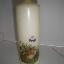

In [ ]:
Image(file_names_test[0])

In [ ]:
all_pic_path = []
for i in range(len(file_names)):
  for j in range(500):
    all_pic_path.append(file_names[i]+str(i)+'.JPEG')

In [ ]:
print(len(all_pic_path))
print(all_pic_path[0])

100000
/content/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG


In [ ]:
X = all_pic_path

In [ ]:
import numpy as np
y = []
for i in range(200):
  y.append([i]*500)

In [ ]:
y = np.array(y)
y.shape

(200, 500)

In [ ]:
y = y.ravel()
print(len(y))
print(y[500])

100000
1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
NUM_OF_IMAGES = 1000
X_train, X_val,y_train, y_val = train_test_split(X[:], y[:], test_size =0.2, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(80000, 80000, 20000, 20000)

In [ ]:
print(X_train[0])
print(y_train[0])

/content/tiny-imagenet-200/train/n03355925/images/n03355925_150.JPEG
150


In [ ]:
from matplotlib.pyplot import imread

In [ ]:
image = imread(X[0])
image.shape

(64, 64, 3)

In [ ]:
IMG_SIZE = 256

In [ ]:
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  # scale and normalize values between 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image

In [ ]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return (image,label)

In [ ]:
BATCH_SIZE = 32

In [ ]:
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data=False):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [ ]:
training_data = create_data_batches(X_train, y_train)

In [ ]:
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [ ]:
test_data = create_data_batches(file_names_test, test_data=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(y[i])

In [ ]:
training_images, train_labels = next(training_data.as_numpy_iterator())
training_images, train_labels

In [ ]:
len(training_images),len(train_labels)

(32, 32)

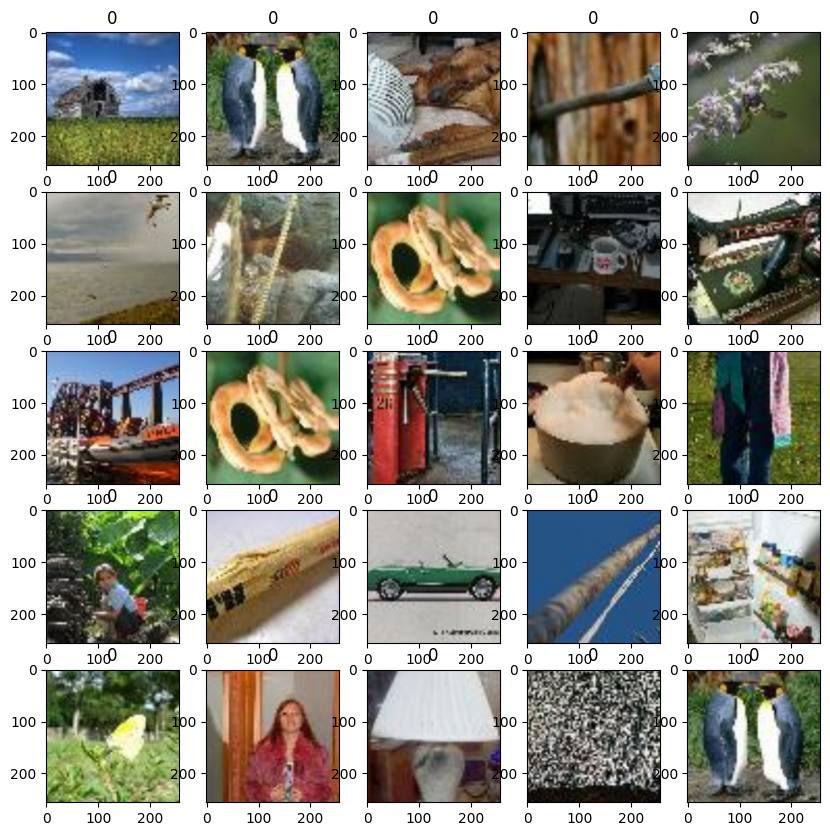

In [ ]:
show_25_images(training_images, train_labels)

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = 200

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras import optimizers

In [ ]:
input = tf.keras.Input(shape=(256,256,3))
efnet = tf.keras.applications.resnet50.ResNet50(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = input)
# Now that we apply global max pooling.
gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)

# Finally, we add a classification layer.
output = tf.keras.layers.Dense(200, activation='softmax')(gap)

# bind all
func_model = tf.keras.Model(efnet.input, output)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
func_model.compile(optimizer = optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = func_model.fit(x = training_data,batch_size=32, epochs=1,validation_data=val_data, validation_freq=1)

2500/2500 [==============================] - 1026s 384ms/step - loss: nan - acc: 0.0051 - val_loss: nan - val_acc: 0.0045


In [ ]:
evaluation = func_model.evaluate(val_data)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

In [ ]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
image = cv2.imread('fish.jpg')
# image = cv2.imread('/content/tiny-imagenet-200/train/n03355925/images/n03355925_150.JPEG')
image = cv2.resize(image,(256,256))
image = image.astype('float32') / 255
image = np.expand_dims(image,axis=0)

In [ ]:
predictions = func_model.predict(image)
i = np.argmax(predictions[0])

1/1 [==============================] - 2s 2s/step


In [ ]:
for idx in range(len(func_model.layers)):
  print(func_model.get_layer(index = idx).name)

In [ ]:
icam = GradCAM(func_model,i,  'conv5_block3_3_conv')
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap,(32,32))

image = cv2.imread('fish.jpg')
image = cv2.resize(image,(32,32))
print(heatmap.shape,image.shape)

(32, 32) (32, 32, 3)


In [ ]:
(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

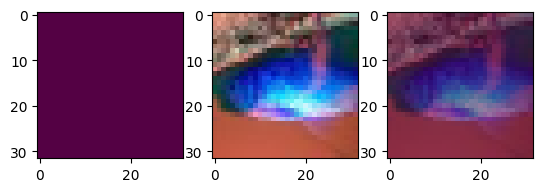

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)